In [1]:
# وارد کردن کتابخانه‌ها / Importieren der Bibliotheken
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# بارگذاری داده‌ها / Laden der Daten
df = pd.read_csv("WineQT.csv")


In [3]:
# نگاهی کلی به داده‌ها / Einen ersten Blick auf die Daten werfen
df.head()  # نمایش ۵ سطر اول / Zeigt die ersten 5 Zeilen an


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
# تقسیم داده‌ها به ویژگی‌ها (X) و هدف (y) / Aufteilen in Merkmale (X) und Zielvariable (y)
X = df.drop('quality', axis=1)   # ویژگی‌ها / Merkmale
y = df['quality']                # هدف / Zielvariable

# تقسیم‌بندی به آموزش و تست (۸۰٪ آموزش، ۲۰٪ تست)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# ساخت مدل جنگل تصادفی / Erstellen des Random Forest Modells
model_rf = RandomForestRegressor(random_state=42)

# آموزش مدل / Modell trainieren
model_rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [9]:
# پیش‌بینی با استفاده از مدل / Vorhersage mit dem Modell
y_pred = model_rf.predict(X_test)

# ارزیابی مدل / Modellbewertung
mse = mean_squared_error(y_test, y_pred)  # محاسبه خطای میانگین مربعات / Berechnung des mittleren quadratischen Fehlers
r2 = r2_score(y_test, y_pred)  # محاسبه R^2 / Berechnung des R^2-Werts

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 0.2979729257641922
R² Score: 0.46453299294085415


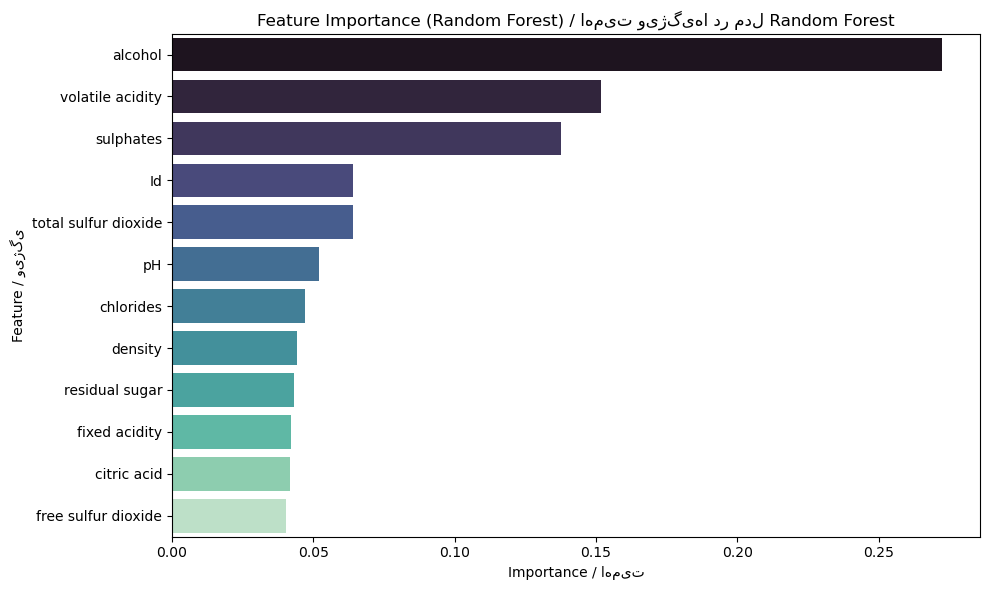

In [23]:
# استخراج اهمیت ویژگی‌ها / Extrahieren der Merkmalswichtigkeit
feature_importance = model_rf.feature_importances_
features = X.columns

# ایجاد دیتافریم برای رسم نمودار / Erstellen eines DataFrames für die Visualisierung
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# رسم نمودار ستونی از اهمیت ویژگی‌ها / Balkendiagramm der Merkmalswichtigkeit
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, hue='Feature', palette='mako', legend=False)
plt.title('Feature Importance (Random Forest) / اهمیت ویژگی‌ها در مدل Random Forest')
plt.xlabel('Importance / اهمیت')
plt.ylabel('Feature / ویژگی')
plt.tight_layout()
plt.show()


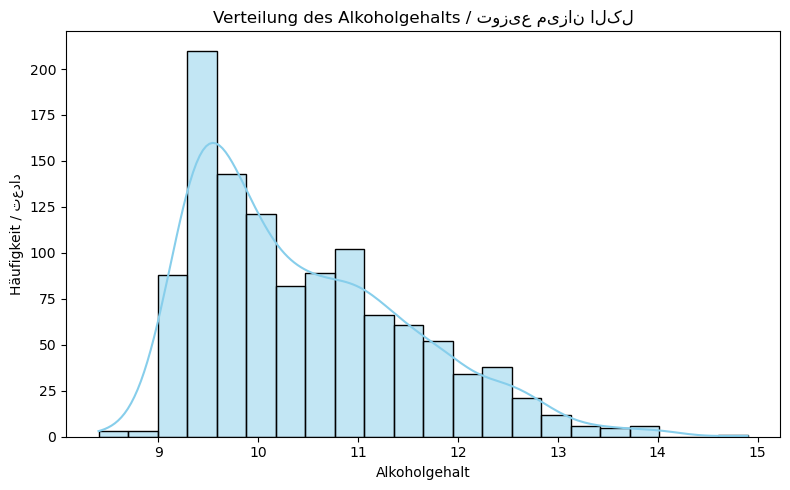

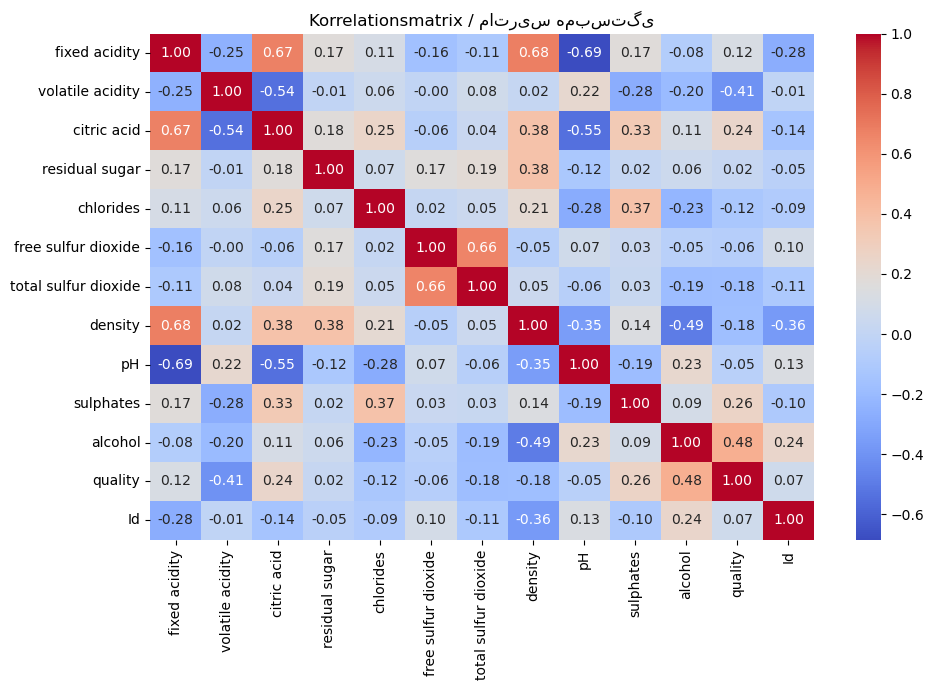

In [13]:
# نمودار توزیع میزان الکل / Histogramm des Alkoholgehalts
plt.figure(figsize=(8, 5))
sns.histplot(df['alcohol'], kde=True, color='skyblue')
plt.title('Verteilung des Alkoholgehalts / توزیع میزان الکل')
plt.xlabel('Alkoholgehalt')
plt.ylabel('Häufigkeit / تعداد')
plt.tight_layout()
plt.show()

# نمودار همبستگی بین ویژگی‌ها / Korrelationsmatrix der Merkmale
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korrelationsmatrix / ماتریس همبستگی')
plt.tight_layout()
plt.show()


In [21]:
# 1. رگرسیون خطی (Linear Regression)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ایجاد مدل رگرسیون خطی
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# پیش‌بینی با مدل رگرسیون خطی
y_pred_lr = lr_model.predict(X_test)

# محاسبه میانگین مربعات خطا و R² برای رگرسیون خطی
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# 2. جنگل تصادفی (Random Forest)
from sklearn.ensemble import RandomForestRegressor

# ایجاد مدل جنگل تصادفی
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# پیش‌بینی با مدل جنگل تصادفی
y_pred_rf = rf_model.predict(X_test)

# محاسبه میانگین مربعات خطا و R² برای جنگل تصادفی
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# 3. XGBoost
import xgboost as xgb

# ایجاد مدل XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# پیش‌بینی با مدل XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# محاسبه میانگین مربعات خطا و R² برای XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# 4. نمایش نتایج
print("Mean Squared Error (Linear Regression):", mse_lr)
print("R² Score (Linear Regression):", r2_lr)
print("Mean Squared Error (Random Forest):", mse_rf)
print("R² Score (Random Forest):", r2_rf)
print("Mean Squared Error (XGBoost):", mse_xgb)
print("R² Score (XGBoost):", r2_xgb)


Mean Squared Error (Linear Regression): 0.38242835212919696
R² Score (Linear Regression): 0.31276385395081874
Mean Squared Error (Random Forest): 0.2979729257641922
R² Score (Random Forest): 0.46453299294085415
Mean Squared Error (XGBoost): 0.3362394869327545
R² Score (XGBoost): 0.3957667946815491


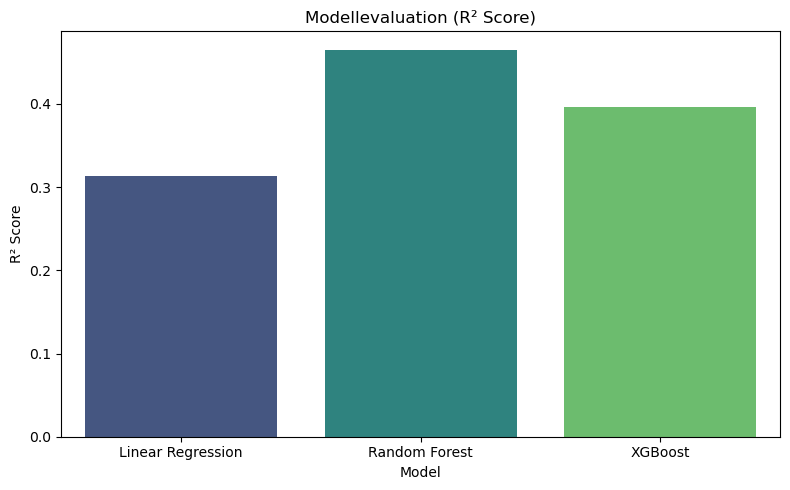

In [19]:
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=r2_scores, hue=models, palette='viridis', legend=False)
plt.title('Modellevaluation (R² Score)')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.tight_layout()
plt.show()
